## import

In [ ]:
from plotting_functions import *

pix_to_micron = 0.1559814453125*2 #conversion factor

: 

## data

In [7]:
df = pd.read_csv(r"C:\Users\Thenzing\Julien\TAPAS-Thomas\reelin_extract_09-10-24\reelin_extract_09-10-24extraction\extraction_2024_11_04-09_51_42.csv")


try:
    df.rename(columns={"Atlas": "Bregma_coord"}, inplace=True)
    bregma_coord = {'FIG9': 2.58, 'FIG10': 2.46, 'FIG11': 2.34, 'FIG12': 2.22, 'FIG13': 2.10, 'FIG14':1.98, 'FIG15':1.94, 'FIG16':1.78}
    df['Bregma_coord'].replace(bregma_coord, inplace=True)
except:
    print('No bregma coordinates data')
try:
    df['Volume_Unit']=df['Volume_Pix']*(pix_to_micron**2*df['PixelSize_Z'])
except: 
    print('No volume data')
try:
    cond = {'Veh': 'Naive'}
    df['Condition'].replace(cond, inplace=True)
except KeyError as e:
    print('No veh', e)
try:
    df_categ = df
    df_categ['Condition'] = pd.Categorical(df_categ['Condition'], categories = ['Naive', 'Win', 'SRWin'], ordered=True)
except:
    print('Problem with categorical data')

try:
    cytoplasmic = df_categ.loc[df_categ['max_intensity']>150].copy()
    binding = df_categ.loc[df_categ['max_intensity']<=150].copy()
except: 
    print('Pb with cyto/binding on intensity')

def mean_animal_fn(dataframe):
    mean_animal = {'Naive' : [], 'Win' : [], 'SRWin' : []}
    for temp in (pd.unique(dataframe['Condition'])):
        print(temp)
        mean_animal[temp] = dataframe[dataframe['Condition']==temp].groupby('ID').mean()

    mean_animal['Win']['Condition']= 'Win'
    mean_animal['Naive']['Condition']= 'Naive'
    mean_animal['SRWin']['Condition']= 'SRWin'
    mean_animal = pd.concat([mean_animal['Naive'],mean_animal['Win'], mean_animal['SRWin']])
    return mean_animal





bins = [i*10 for i in range(0, 51)]
datatemp = df
datatemp['bins2'] = pd.cut(datatemp['distUnit'], bins)
minibin = datatemp.groupby(['Condition', 'Bregma_coord', 'bins2'])['max_intensity'].mean()
minibin.to_csv(r"C:\Users\Thenzing\Julien\TAPAS-Thomas\data_allcells\groupey.csv")
#passage en csv puis rechargement du fichier pour contourner pb de mise en forme
minibin = pd.read_csv(r"C:\Users\Thenzing\Julien\TAPAS-Thomas\data_allcells\groupey.csv")
# Define the bin size and range
bin_size = 10
bin_range = range(0, 501, bin_size)

# Create an empty dictionary to store the bin-middle value pairs
bin_dict = {}

# Iterate through the bin range
for i in range(len(bin_range) - 1):
    # Define the bin in the form of (start_value, end_value]
    bin_interval = (bin_range[i], bin_range[i + 1])
    # Calculate the middle value of each bin's range
    middle_value = (bin_range[i] + bin_range[i + 1]) / 2
    # Assign the middle value to the bin
    bin_dict[bin_interval] = middle_value

# Convert the dictionary keys to strings for display purposes
bin_dict_display = {f"({key[0]}, {key[1]}]": value for key, value in bin_dict.items()}

# Print the dictionary
print(bin_dict_display)

minibin['bins2'].replace(bin_dict_display, inplace=True)
tropcool = minibin




mean_animal_all = mean_animal_fn(df_categ)
mean_animal_cyto = mean_animal_fn(cytoplasmic)
mean_animal_binding = mean_animal_fn(binding)

bin_count_all = bin_count_fn(df_categ)
bin_count_cyto = bin_count_fn(cytoplasmic)
bin_count_binding = bin_count_fn(binding)

mean_density_all = mean_density_fn(bin_count_all)
mean_density_cyto = mean_density_fn(bin_count_cyto)
mean_density_binding = mean_density_fn(bin_count_binding)

fig910_all, fig1112_all, fig13_all, fig1415_all = figs(bin_count_all)
fig910_cyto, fig1112_cyto, fig13_cyto, fig1415_cyto = figs(bin_count_cyto)
fig910_binding, fig1112_binding, fig13_binding, fig1415_binding = figs(bin_count_binding)

No volume data
No veh 'Condition'
Problem with categorical data


KeyError: 'Condition'

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'imageLabel_x', 'Label', 'distPix',
       'distUnit', 'side', 'length', 'P1x', 'P1y', 'P2x', 'P2y', 'Cx_Pix',
       'Cy_Pix', 'Cz_Pix', 'Z-Section', 'PixelSize_Z', 'Height',
       'pix_to_micron', 'volume_roi', 'volumic_density', 'Volume_Unit',
       'Volume_Pix', 'mean_intensity', 'intensity_sd', 'min_intensity',
       'max_intensity', 'voxel_intensity_sum', 'Exp_Date', 'Batch', 'Ori',
       'Condition', 'Age', 'Sex', 'Strain', 'Marker', 'Slide_ID',
       'Bregma_coord', 'Slide_side', 'bins', 'ID', 'bins2'],
      dtype='object')

In [12]:
pl = df['Condition'].unique()
print(pl)

['Naive', 'Win', 'SRWin']
Categories (3, object): ['Naive' < 'Win' < 'SRWin']


In [3]:
L=df[df['Condition']=='Win']['imageLabel_x'].unique()
df_ground_truth=pd.DataFrame(columns=['image_title', 'tile'])
for int_ground in range(10):
    df_ground_truth.loc[int_ground, 'image_title']=rn.choice(L)
    df_ground_truth.loc[int_ground, 'tile']=rn.randint(1,9)
df_ground_truth.to_csv(r'C:\Users\Thenzing\Julien\TAPAS-Thomas\images_ground_truth_Win2.csv')
    

## Plots

C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=6.730e-01 U_stat=4.100e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.626e-01 U_stat=3.700e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=5.962e-01 U_stat=4.700e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=6.730e-01 U_stat=3.100e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=7.445e-02 U_stat=5.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.193e-03 U_stat=7.200e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=9.272e-02 U_stat=5.400e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=5.414e-01 U_stat=4.300e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=4.123e-04 U_stat=8.100e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=4.640e-02 U_stat=5.700e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=7.430e-01 U_stat=4.000e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=2.680e-03 U_stat=7.500e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=2.766e-01 U_stat=2.400e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.139e-01 U_stat=5.300e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=7.911e-01 U_stat=4.400e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=2.766e-01 U_stat=4.800e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=5.923e-02 U_stat=5.600e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=5.736e-04 U_stat=8.000e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=6.730e-01 U_stat=3.100e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.730e-01 U_stat=3.100e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.340e-02 U_stat=2.100e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=2.359e-01 U_stat=2.300e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=7.445e-02 U_stat=5.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.000e+00 U_stat=4.000e+01


C:\Windows\Temp\ipykernel_7452\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=7.445e-02 U_stat=5.500e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=3.213e-01 U_stat=4.700e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=7.923e-04 U_stat=7.900e+01


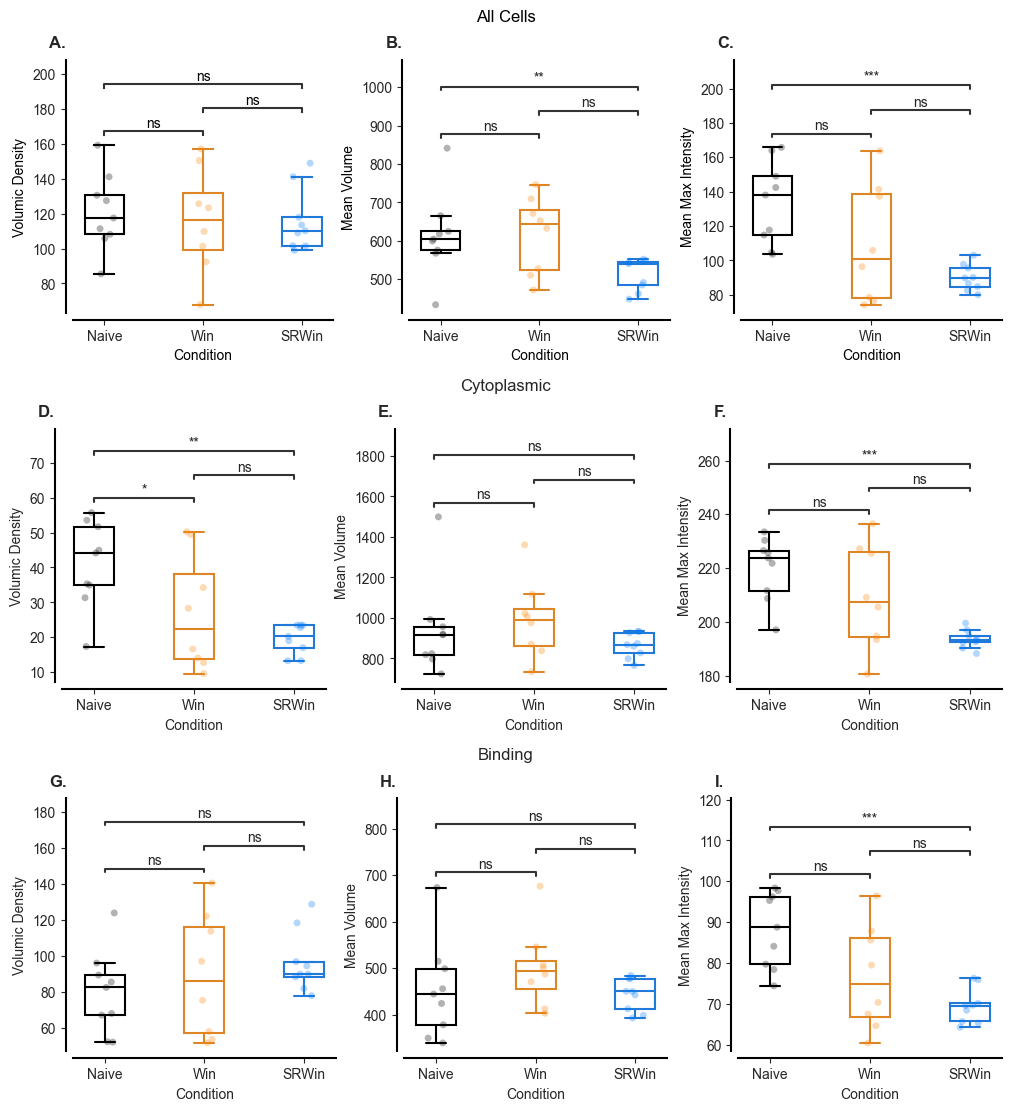

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(10, 11))

(row1, row2, row3) = fig.subfigures(3, 1)
(mid1, mid2, mid3) = row1.subplots(1, 3)

row1.suptitle('All Cells')
custom_boxplot(data = mean_density_all, x = 'Condition', y = 'volumic_density_total', ax=mid1, letter = 'A.', xlabel = 'Condition', ylabel='Volumic Density' )
custom_boxplot(data = mean_animal_all, x = 'Condition', y = 'Volume_Unit', ax = mid2, letter = 'B.', xlabel = 'Condition', ylabel='Mean Volume')
custom_boxplot(data = mean_animal_all, x = 'Condition', y = 'max_intensity', ax = mid3, letter = 'C.', xlabel = 'Condition', ylabel='Mean Max Intensity')

row2.suptitle('Cytoplasmic')
(mid1, mid2, mid3) = row2.subplots(1, 3)
custom_boxplot(data = mean_density_cyto, x = 'Condition', y = 'volumic_density_total', ax=mid1, letter = 'D.', xlabel = 'Condition', ylabel='Volumic Density' )
custom_boxplot(data = mean_animal_cyto, x = 'Condition', y = 'Volume_Unit', ax = mid2, letter = 'E.', xlabel = 'Condition', ylabel='Mean Volume')
custom_boxplot(data = mean_animal_cyto, x = 'Condition', y = 'max_intensity', ax = mid3, letter = 'F.', xlabel = 'Condition', ylabel='Mean Max Intensity')

row3.suptitle('Binding')
(mid1, mid2, mid3) = row3.subplots(1, 3)
custom_boxplot(data = mean_density_binding, x = 'Condition', y = 'volumic_density_total', ax=mid1, letter = 'G.', xlabel = 'Condition', ylabel='Volumic Density' )
custom_boxplot(data = mean_animal_binding, x = 'Condition', y = 'Volume_Unit', ax = mid2, letter = 'H.', xlabel = 'Condition', ylabel='Mean Volume')
custom_boxplot(data = mean_animal_binding, x = 'Condition', y = 'max_intensity', ax = mid3, letter = 'I.', xlabel = 'Condition', ylabel='Mean Max Intensity')

sns.despine(offset=5, trim=False)

<Axes: xlabel='Condition', ylabel='volumic_density_layer23'>

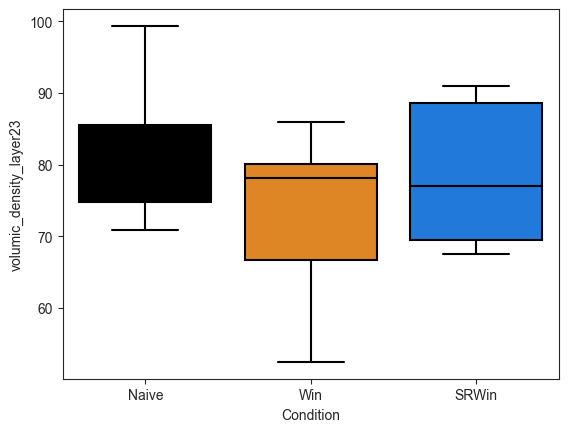

In [11]:

sns.boxplot(data=mean_density_all, x='Condition', y = 'volumic_density_layer23',)

C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=8.329e-01 U_stat=2.200e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=4.234e-01 U_stat=4.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.064e-01 U_stat=2.700e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=8.329e-01 U_stat=2.200e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=4.234e-01 U_stat=4.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.064e-01 U_stat=2.700e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=3.543e-01 U_stat=2.700e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.626e-01 U_stat=3.700e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.469e-01 U_stat=3.400e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.709e-01 U_stat=3.000e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=2.766e-01 U_stat=4.800e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=2.222e-01 U_stat=2.900e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.058e-01 U_stat=4.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=4.507e-02 U_stat=3.400e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.058e-01 U_stat=4.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=2.222e-01 U_stat=1.100e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=3.213e-01 U_stat=2.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=3.996e-03 U_stat=2.000e+00


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=7.242e-01 U_stat=1.700e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=2.766e-01 U_stat=2.400e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.469e-01 U_stat=1.100e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=8.329e-01 U_stat=2.200e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.626e-01 U_stat=3.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.000e+00 U_stat=2.200e+01


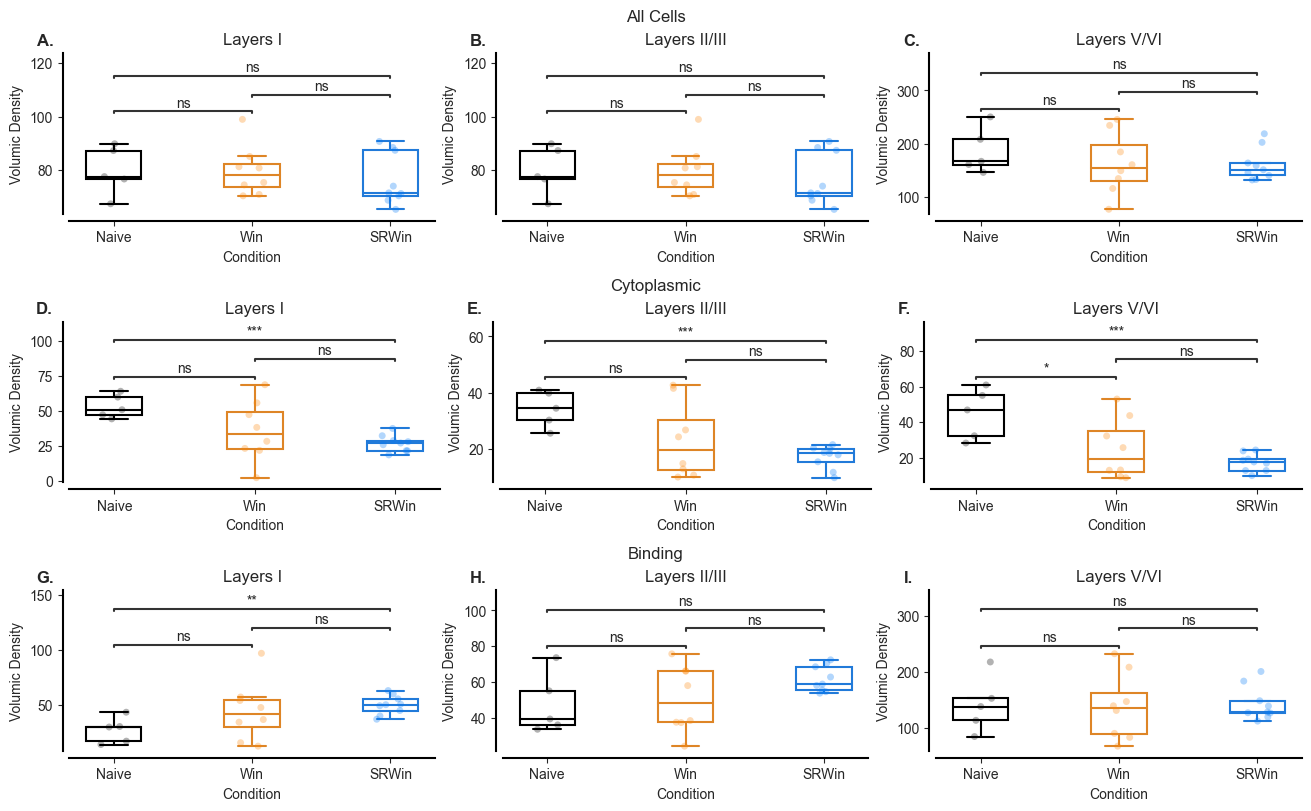

In [22]:
fig = plt.figure(constrained_layout=True, figsize=(13, 8))

(row1, row2, row3) = fig.subfigures(3, 1)

(mid1, mid2, mid3) = row1.subplots(1, 3)


row1.suptitle('All Cells')
custom_boxplot(data = mean_density_all, x = 'Condition', y = 'volumic_density_layer1', ax=mid1, letter = 'A.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers I')
custom_boxplot(data = mean_density_all, x = 'Condition', y = 'volumic_density_layer1', ax = mid2, letter = 'B.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers II/III')
custom_boxplot(data = mean_density_all, x = 'Condition', y = 'volumic_density_layer56', ax = mid3, letter = 'C.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers V/VI')

row2.suptitle('Cytoplasmic')
(mid1, mid2, mid3) = row2.subplots(1, 3)
custom_boxplot(data = mean_density_cyto, x = 'Condition', y = 'volumic_density_layer1', ax=mid1, letter = 'D.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers I' )
custom_boxplot(data = mean_density_cyto, x = 'Condition', y = 'volumic_density_layer23', ax = mid2, letter = 'E.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers II/III')
custom_boxplot(data = mean_density_cyto, x = 'Condition', y = 'volumic_density_layer56', ax = mid3, letter = 'F.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers V/VI')

row3.suptitle('Binding')
(mid1, mid2, mid3) = row3.subplots(1, 3)
custom_boxplot(data = mean_density_binding, x = 'Condition', y = 'volumic_density_layer1', ax=mid1, letter = 'G.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers I' )
custom_boxplot(data = mean_density_binding, x = 'Condition', y = 'volumic_density_layer23', ax = mid2, letter = 'H.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers II/III')
custom_boxplot(data = mean_density_binding, x = 'Condition', y = 'volumic_density_layer56', ax = mid3, letter = 'I.', xlabel = 'Condition', ylabel='Volumic Density', title='Layers V/VI')

sns.despine(offset=5, trim=False)


### Panel 1

C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=6.527e-02 U_stat=3.300e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=7.430e-01 U_stat=4.000e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.274e-01 U_stat=9.000e+00
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.139e-01 U_stat=5.300e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.000e+00 U_stat=2.200e+01


C:\Windows\Temp\ipykernel_16232\379656650.py:172: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = data,


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=4.351e-01 U_stat=2.600e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=5.923e-02 U_stat=5.600e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


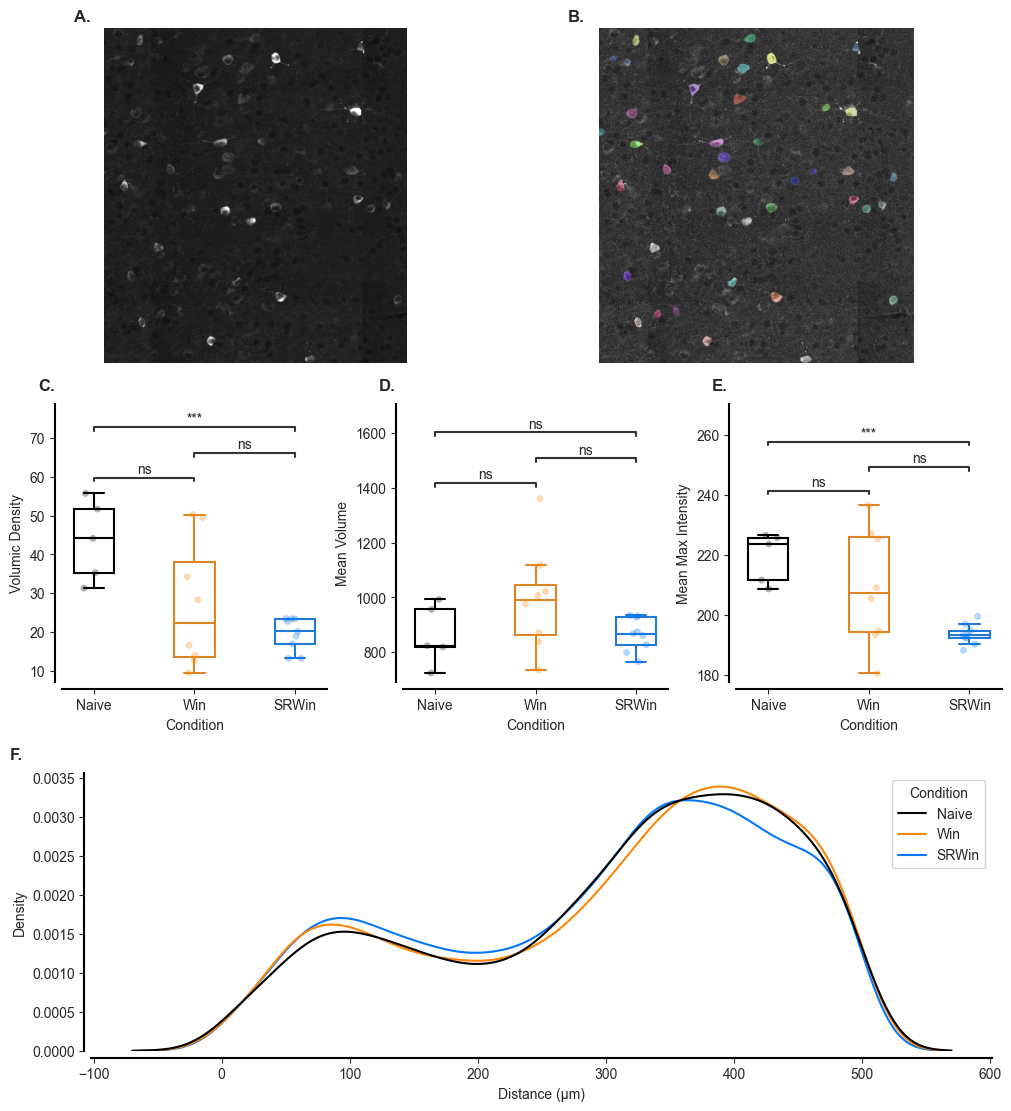

In [15]:
img = np.asarray(Image.open(r'C:\Users\Thenzing\Julien\TAPAS-Thomas\19326_B2_Mouse4_Veh_P36_M_C57_Rln_PFC1_FIG14_L.czi-1.tif'))
mask = np.asarray(Image.open(r'C:\Users\Thenzing\Julien\TAPAS-Thomas\19326_B2_Mouse4_Veh_P36_M_C57_Rln_PFC1_FIG14_L.czi-1_cp_masks.png'))

fig = plt.figure(constrained_layout=True, figsize=(10, 11))



(row1, row2, row3) = fig.subfigures(3, 1)


left, right = row1.subplots(1, 2)

left.set_axis_off()
left.imshow(img)
letter_annotation(left, -0.1, 1.02, 'A.')

right.set_axis_off()
right.imshow(mask)
letter_annotation(right, -0.1, 1.02, 'B.')


(mid1, mid2, mid3) = row2.subplots(1, 3)


custom_boxplot(data = mean_density_cyto, x = 'Condition', y = 'volumic_density_total', ax=mid1, letter = 'C.', xlabel = 'Condition', ylabel='Volumic Density' )

custom_boxplot(data = mean_animal_cyto, x = 'Condition', y = 'Volume_Unit', ax = mid2, letter = 'D.', xlabel = 'Condition', ylabel='Mean Volume')

custom_boxplot(data = mean_animal_cyto, x = 'Condition', y = 'max_intensity', ax = mid3, letter = 'E.', xlabel = 'Condition', ylabel='Mean Max Intensity')

sns.despine(offset=5, trim=False)



ax = row3.subplots(1, 1)
sns.kdeplot(data = df, x="distUnit", hue="Condition", common_norm=False, palette=sns.color_palette(), ax= ax).set(xlabel = "Distance (µm)")
letter_annotation(ax, -0.09, 1.05, 'F.')
sns.despine(offset=5, trim=False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
sns.set_style("ticks")

Text(0.5, 1.0, 'SRWin')

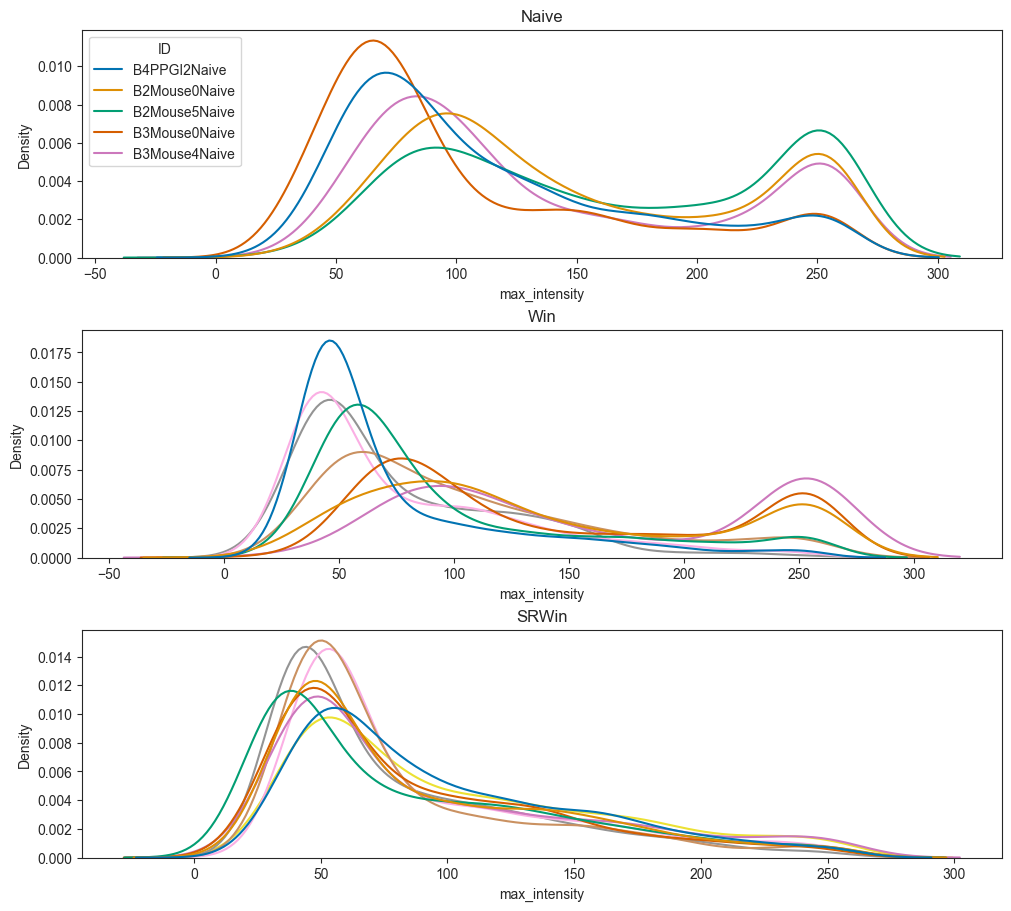

In [16]:
fig, ax = plt.subplots(3,1, figsize = (10,9), constrained_layout=True)
sns.kdeplot(data = df[df['Condition']=='Naive'], x="max_intensity", hue="ID", common_norm=False, palette='colorblind', legend=True, ax = ax[0])
ax[0].set_title('Naive')
sns.kdeplot(data = df[df['Condition']=='Win'], x="max_intensity", hue="ID", common_norm=False, palette='colorblind', legend=False, ax = ax[1])
ax[1].set_title('Win')
sns.kdeplot(data = df[df['Condition']=='SRWin'], x="max_intensity", hue="ID", common_norm=False, palette='colorblind', legend=False, ax = ax[2])
ax[2].set_title('SRWin')

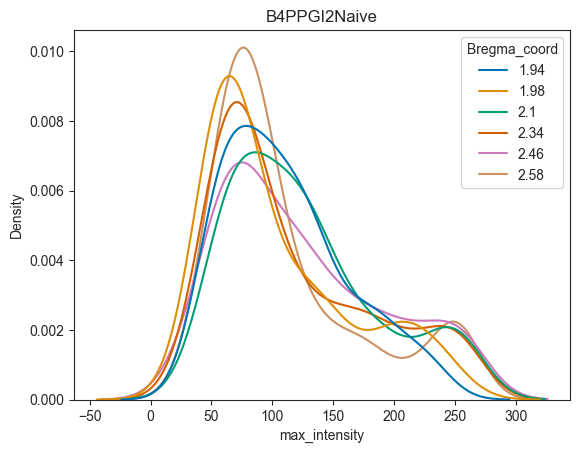

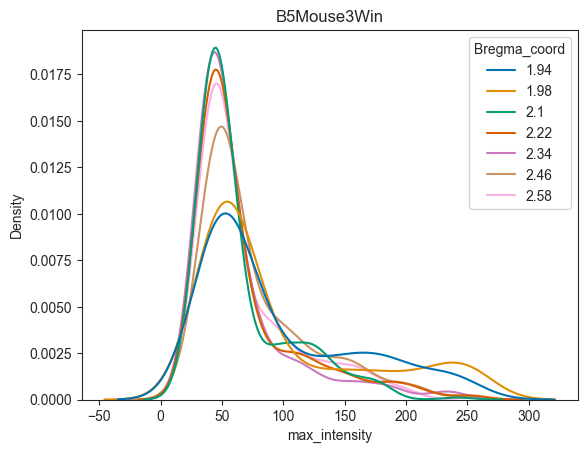

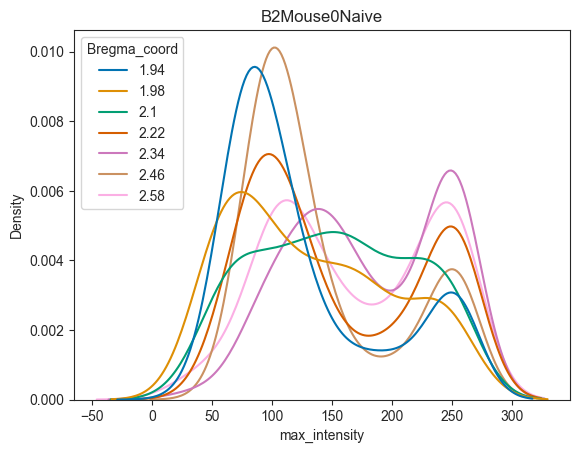

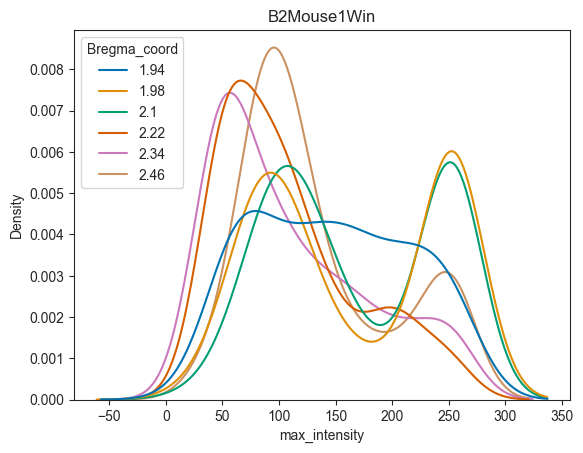

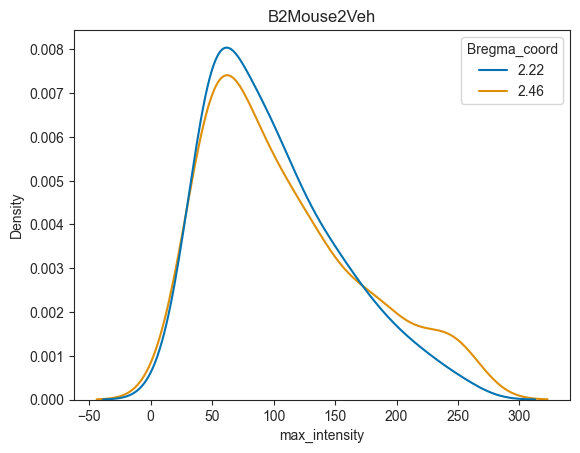

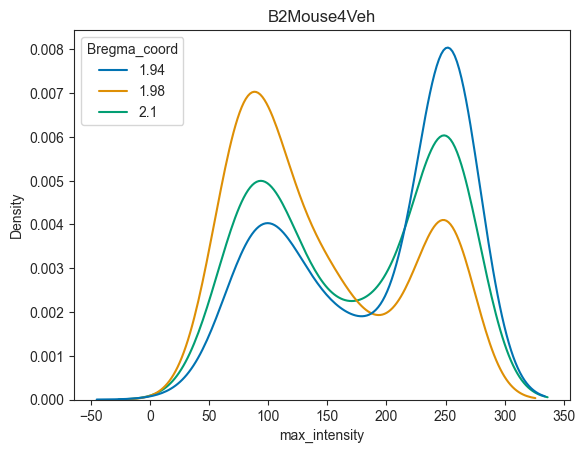

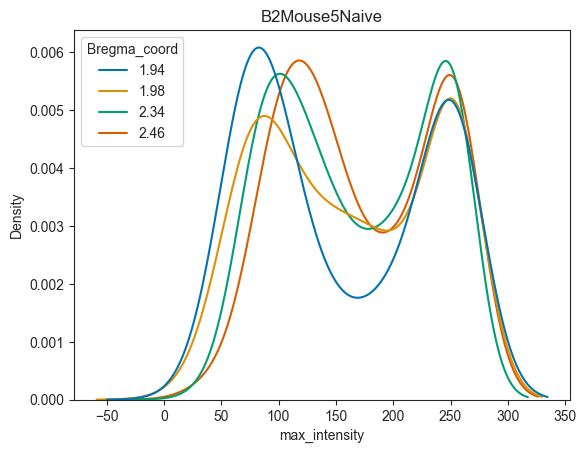

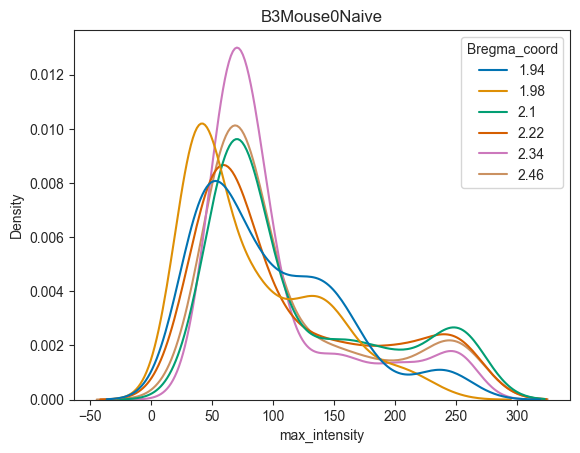

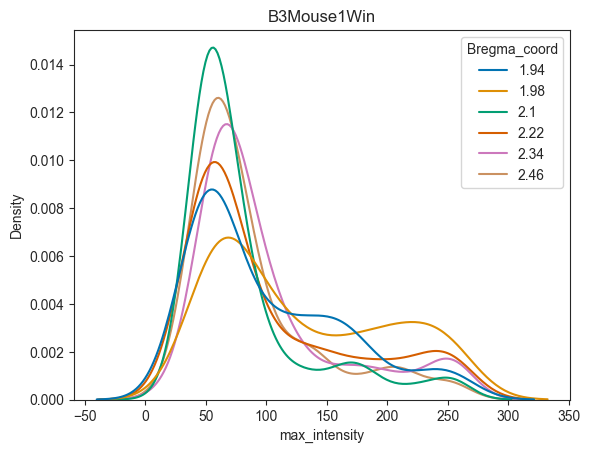

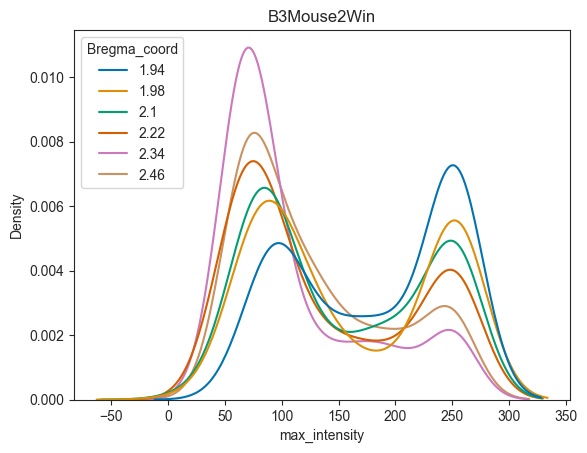

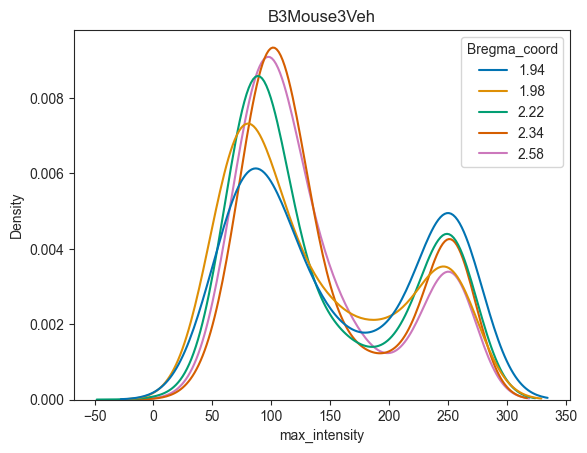

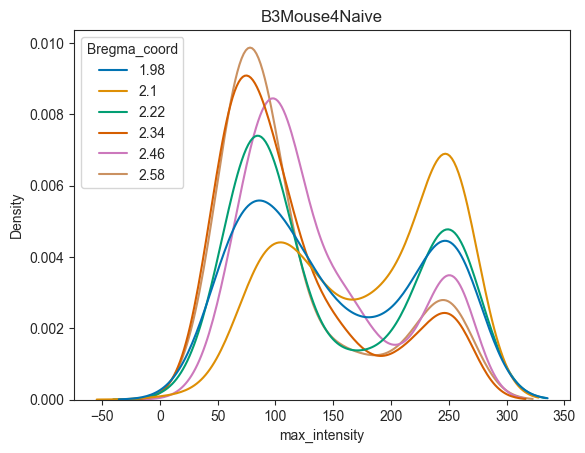

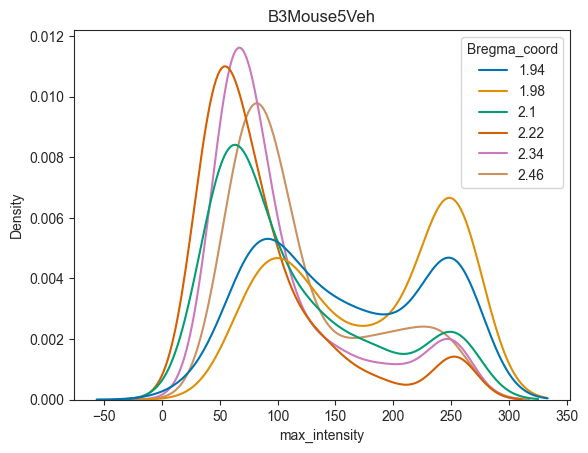

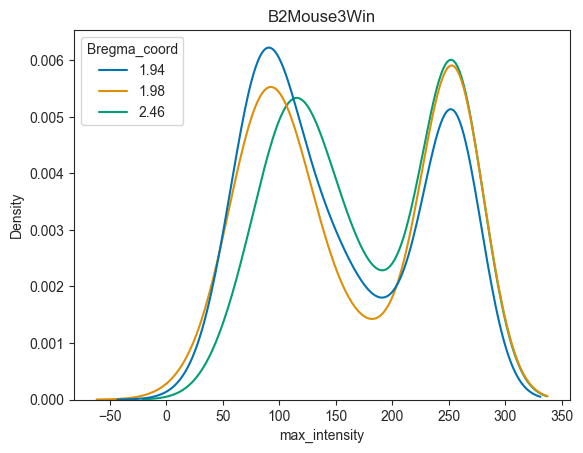

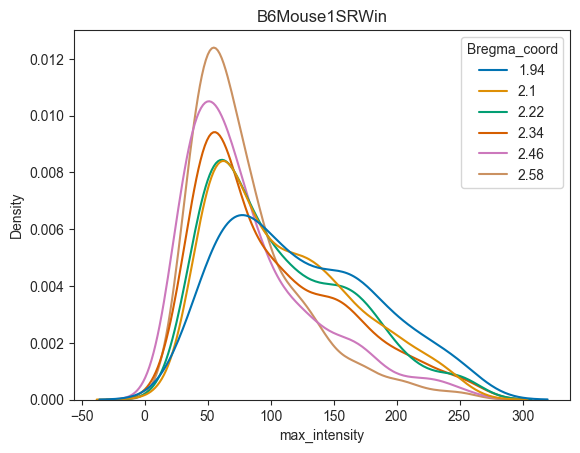

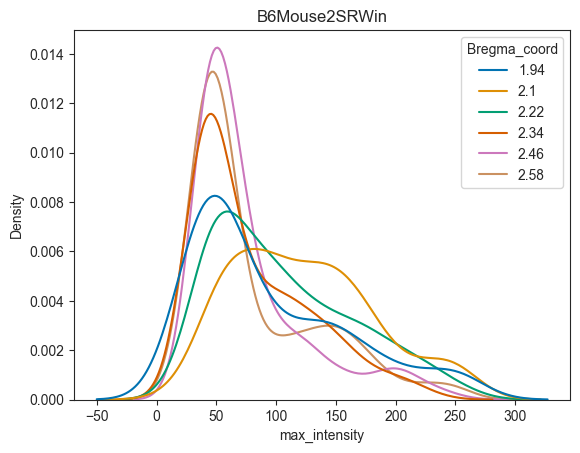

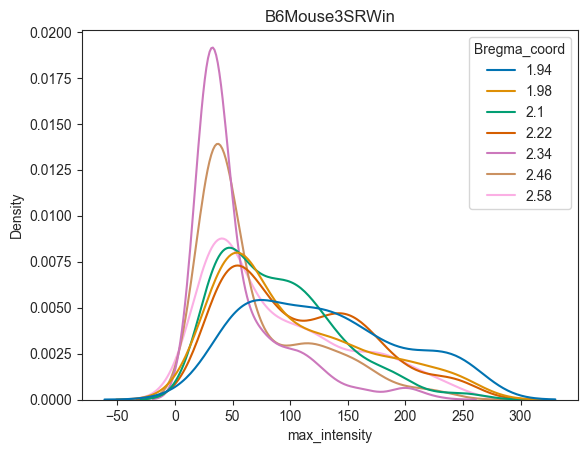

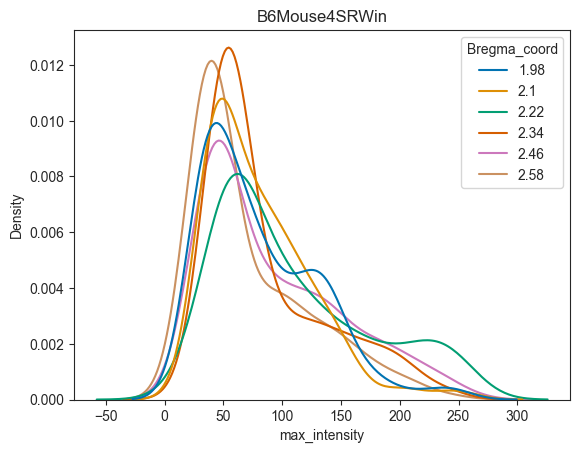

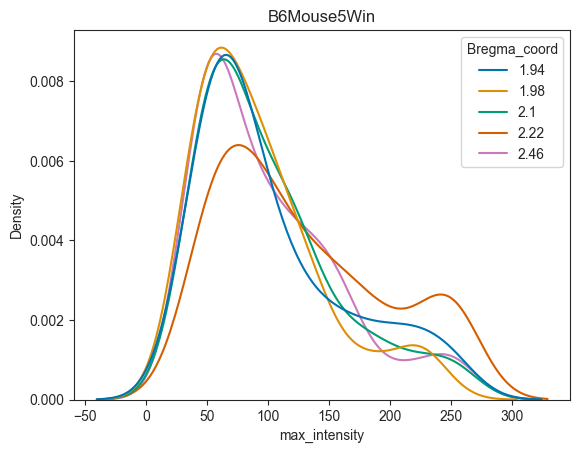

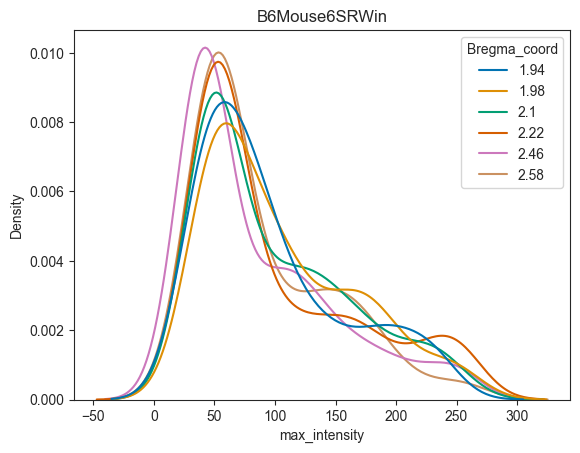

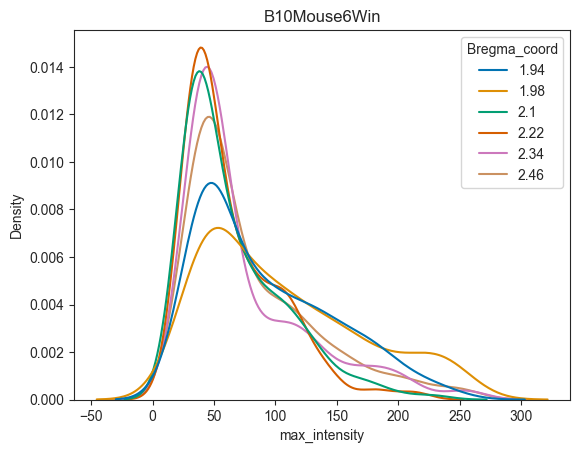

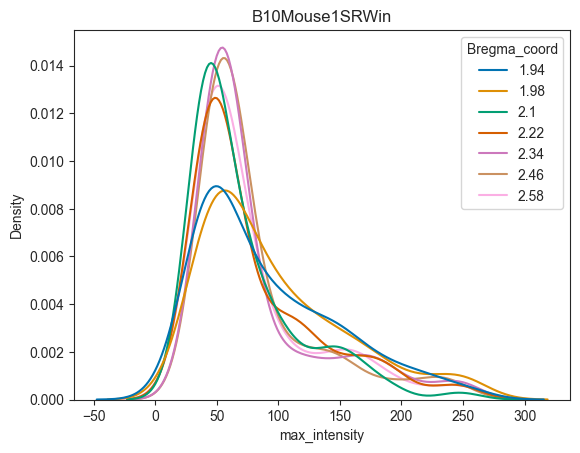

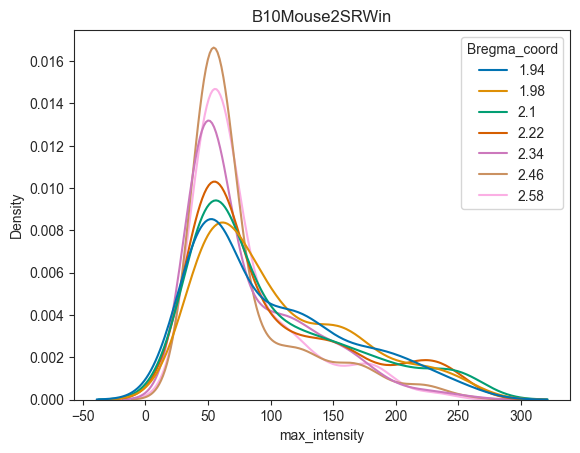

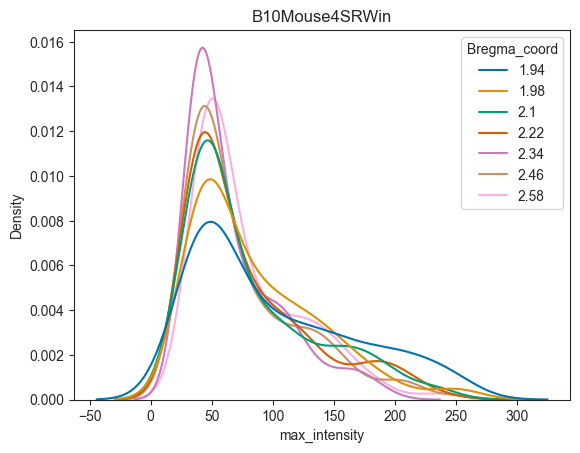

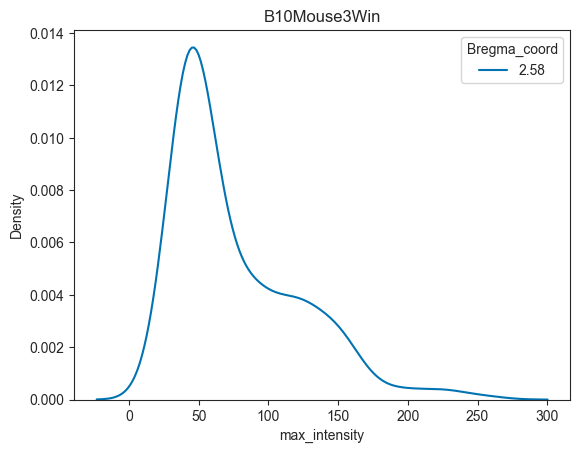

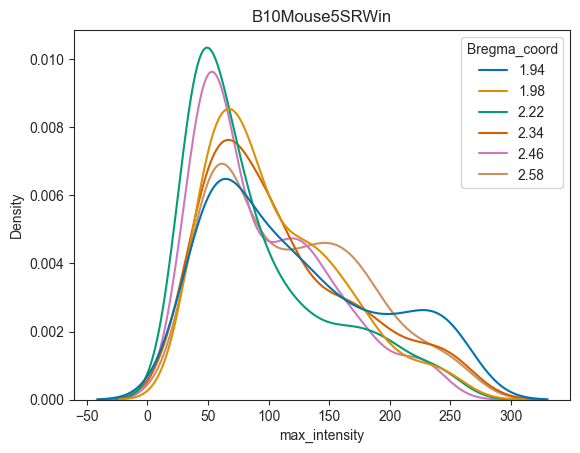

In [17]:
for id in df['ID'].unique():
    sns.kdeplot(data = df[df['ID']==id], x="max_intensity", hue="Bregma_coord", common_norm=False, palette='colorblind', legend=True)
    plt.title(id)
    plt.show()

### Panel 2

C:\Windows\Temp\ipykernel_16232\1088842865.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=mean_density, x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.709e-01 U_stat=3.000e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=2.766e-01 U_stat=4.800e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\1088842865.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=mean_density,x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=2.222e-01 U_stat=2.900e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.058e-01 U_stat=4.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\1088842865.py:81: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=mean_density,x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=4.507e-02 U_stat=3.400e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.058e-01 U_stat=4.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\1088842865.py:116: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=9.324e-02 U_stat=3.200e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.730e-01 U_stat=4.100e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\1088842865.py:150: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=8.658e-03 U_stat=2.900e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.070e-01 U_stat=3.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\1088842865.py:184: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.714e-01 U_stat=1.900e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=8.518e-01 U_stat=2.600e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=8.081e-03 U_stat=3.100e+01


C:\Windows\Temp\ipykernel_16232\1088842865.py:218: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.000e+00 U_stat=1.700e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.738e-01 U_stat=4.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=2.977e-01 U_stat=3.100e+01


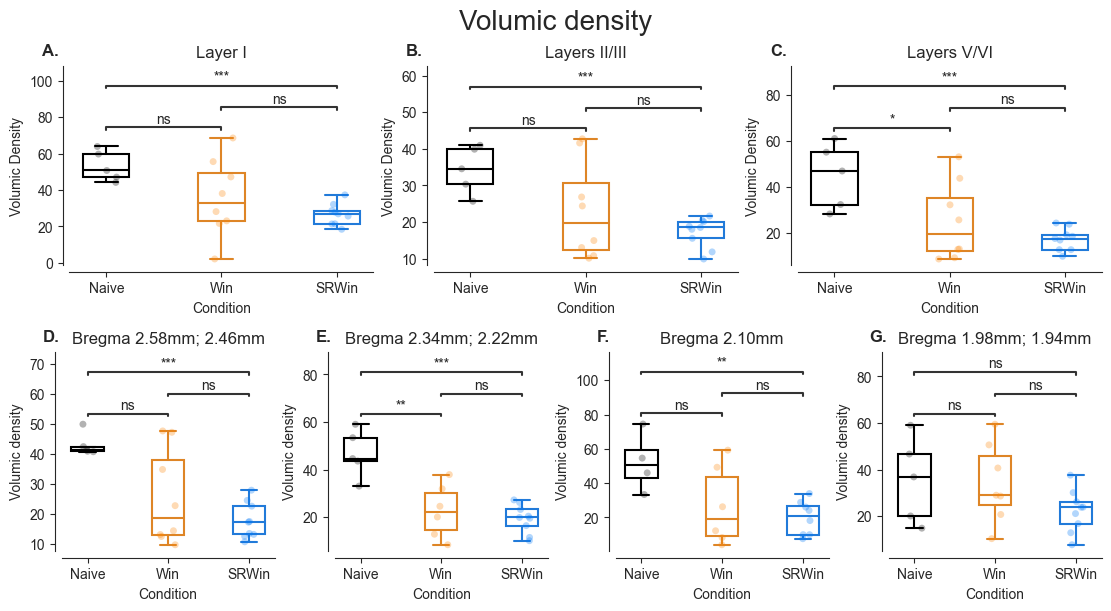

In [30]:
fig = plt.figure(constrained_layout=True, figsize=(11, 6))
mean_density = mean_density_cyto
fig910=fig910_cyto
fig1112=fig1112_cyto
fig13=fig13_cyto
fig1415=fig1415_cyto
colors = ['#000000','#FC8608','#0379F7']
customPalette = sns.set_palette(sns.color_palette(colors))

(row1, row2) = fig.subfigures(2, 1)
left, mid, right = row1.subplots(1, 3)
boxp =[("Naive", "Win"), ("SRWin", "Naive"),("SRWin", "Win")]
plt.suptitle('Volumic density', fontsize = 20)
ax = left
plot_med1 = sns.boxplot(data=mean_density, y='volumic_density_layer1', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(data=mean_density, x = "Condition",
              y = "volumic_density_layer1",
              palette=sns.color_palette(),
              alpha = 0.3,
              ax=ax)
ax.set(title = 'Layer I', ylabel='Volumic Density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=mean_density, x="Condition", y='volumic_density_layer1', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'A.')

ax = mid
plot_med1 = sns.boxplot(data=mean_density, y='volumic_density_layer23', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(data=mean_density,x = "Condition",
              y = "volumic_density_layer23",
              palette=sns.color_palette(),
              alpha = 0.3,
              ax=ax)
ax.set(title='Layers II/III', ylabel='Volumic Density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=mean_density, x="Condition", y='volumic_density_layer23', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'B.')


ax = right
plot_med1 = sns.boxplot(data=mean_density, y='volumic_density_layer56', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(data=mean_density,x = "Condition",
              y = "volumic_density_layer56",
              palette=sns.color_palette(),
              alpha = 0.3,
              ax=ax)
ax.set(title='Layers V/VI', ylabel='Volumic Density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=mean_density, x="Condition", y='volumic_density_layer56', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'C.')


left, mid1, mid2, right = row2.subplots(1, 4)
ax=left

plot_med1 = sns.boxplot(fig910, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig910,
              ax=ax)
ax.set(title = 'Bregma 2.58mm; 2.46mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=fig910, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'D.')


ax = mid1
plot_med1 = sns.boxplot(fig1112, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig1112,
              ax=ax)
ax.set(title = 'Bregma 2.34mm; 2.22mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=fig1112, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'E.')


ax = mid2
plot_med1 = sns.boxplot(fig13, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig13,
              ax=ax)
ax.set(title = 'Bregma 2.10mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=fig13, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'F.')


ax = right
plot_med1 = sns.boxplot(fig1415, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig1415,
              ax=ax)
ax.set(title = 'Bregma 1.98mm; 1.94mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers

add_stat_annotation(plot_med1, data=fig1415, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'G.')





sns.despine(offset=5, trim=False)



C:\Windows\Temp\ipykernel_16232\3298376061.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=mean_density, x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.709e-01 U_stat=3.000e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=2.766e-01 U_stat=4.800e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\3298376061.py:48: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=mean_density,x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=2.222e-01 U_stat=2.900e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.058e-01 U_stat=4.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\3298376061.py:81: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=mean_density,x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=4.507e-02 U_stat=3.400e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.058e-01 U_stat=4.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\3298376061.py:116: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=9.324e-02 U_stat=3.200e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.730e-01 U_stat=4.100e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\3298376061.py:150: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=8.658e-03 U_stat=2.900e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=6.070e-01 U_stat=3.200e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=9.990e-04 U_stat=4.500e+01


C:\Windows\Temp\ipykernel_16232\3298376061.py:184: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.714e-01 U_stat=1.900e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=8.518e-01 U_stat=2.600e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=8.081e-03 U_stat=3.100e+01


C:\Windows\Temp\ipykernel_16232\3298376061.py:218: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.000e+00 U_stat=1.700e+01
Win v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=1.738e-01 U_stat=4.500e+01
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=2.977e-01 U_stat=3.100e+01


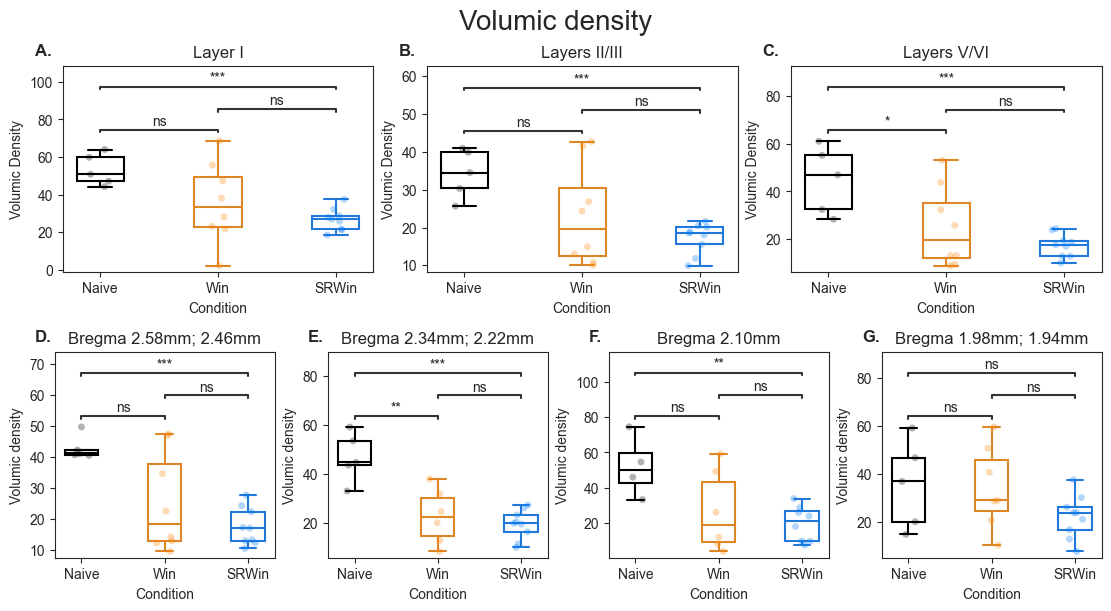

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(11, 6))

colors = ['#000000','#FC8608','#0379F7']
customPalette = sns.set_palette(sns.color_palette(colors))
mean_density = mean_density_cyto
fig910=fig910_cyto
fig1112=fig1112_cyto
fig13=fig13_cyto
fig1415=fig1415_cyto
(row1, row2) = fig.subfigures(2, 1)
left, mid, right = row1.subplots(1, 3)
boxp =[("Naive", "Win"), ("SRWin", "Naive"),("SRWin", "Win")]
plt.suptitle('Volumic density', fontsize = 20)
ax = left
plot_med1 = sns.boxplot(data=mean_density, y='volumic_density_layer1', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(data=mean_density, x = "Condition",
              y = "volumic_density_layer1",
              palette=sns.color_palette(),
              alpha = 0.3,
              ax=ax)
ax.set(title = 'Layer I', ylabel='Volumic Density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=mean_density, x="Condition", y='volumic_density_layer1', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'A.')

ax = mid
plot_med1 = sns.boxplot(data=mean_density, y='volumic_density_layer23', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(data=mean_density,x = "Condition",
              y = "volumic_density_layer23",
              palette=sns.color_palette(),
              alpha = 0.3,
              ax=ax)
ax.set(title='Layers II/III', ylabel='Volumic Density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=mean_density, x="Condition", y='volumic_density_layer23', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'B.')


ax = right
plot_med1 = sns.boxplot(data=mean_density, y='volumic_density_layer56', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(data=mean_density,x = "Condition",
              y = "volumic_density_layer56",
              palette=sns.color_palette(),
              alpha = 0.3,
              ax=ax)
ax.set(title='Layers V/VI', ylabel='Volumic Density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=mean_density, x="Condition", y='volumic_density_layer56', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'C.')


left, mid1, mid2, right = row2.subplots(1, 4)
ax=left

plot_med1 = sns.boxplot(fig910, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig910,
              ax=ax)
ax.set(title = 'Bregma 2.58mm; 2.46mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=fig910, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'D.')


ax = mid1
plot_med1 = sns.boxplot(fig1112, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig1112,
              ax=ax)
ax.set(title = 'Bregma 2.34mm; 2.22mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=fig1112, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'E.')


ax = mid2
plot_med1 = sns.boxplot(fig13, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig13,
              ax=ax)
ax.set(title = 'Bregma 2.10mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers
add_stat_annotation(plot_med1, data=fig13, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'F.')


ax = right
plot_med1 = sns.boxplot(fig1415, y='volumic_density_total', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "volumic_density_total",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = fig1415,
              ax=ax)
ax.set(title = 'Bregma 1.98mm; 1.94mm', ylabel = 'Volumic density')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers

add_stat_annotation(plot_med1, data=fig1415, x="Condition", y='volumic_density_total', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'G.')

### Panel 3 

C:\Windows\Temp\ipykernel_16232\617097190.py:27: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "Condition",


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Naive v.s. Win: Mann-Whitney-Wilcoxon test two-sided, P_val=1.846e-02 U_stat=2.378e+06
Naive v.s. SRWin: Mann-Whitney-Wilcoxon test two-sided, P_val=4.183e-136 U_stat=3.092e+06


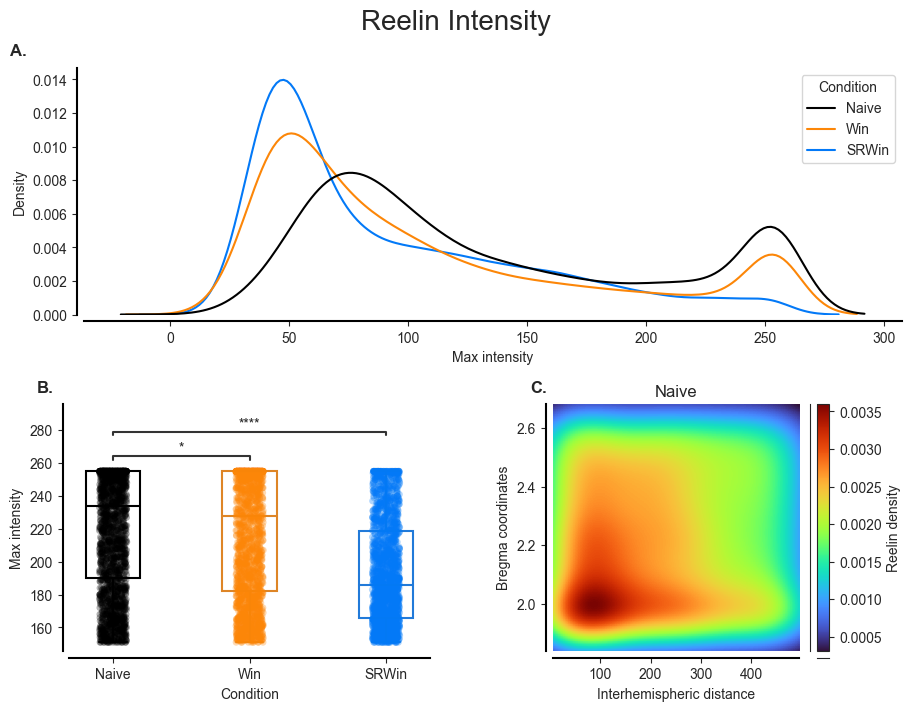

In [29]:
fig = plt.figure(constrained_layout=True, figsize=(9, 7))
fig.suptitle('Reelin Intensity', fontsize = 20)
colors = ['#000000','#FC8608','#0379F7']
customPalette = sns.set_palette(sns.color_palette(colors))

colors = ['#000000','#FC8608','#0379F7']
customPalette = sns.set_palette(sns.color_palette(colors))

(row1, row2) = fig.subfigures(2, 1)

ax = row1.subplots(1,1)
sns.kdeplot(data = df, x="max_intensity", hue="Condition", palette = customPalette, common_norm=False, ax = ax).set(xlabel = "Max intensity")
letter_annotation(ax, -0.09, 1.05, 'A.')

left, right = row2.subplots(1, 2)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
sns.set_style("ticks")


ax = left

plot_med1 = sns.boxplot(cytoplasmic, y='max_intensity', x = 'Condition', ax=ax, showfliers = False, width=0.4, palette=customPalette)
sns.stripplot(x = "Condition",
              y = "max_intensity",
              palette=sns.color_palette(),
              alpha = 0.3,
              data = cytoplasmic,
              ax=ax)
ax.set( ylabel = 'Max intensity')
box_patches = [patch for patch in ax.patches if type(patch) == matplotlib.patches.PathPatch]
if len(box_patches) == 0:  # in matplotlib older than 3.5, the boxes are stored in ax2.artists
    box_patches = ax.artists
num_patches = len(box_patches)
lines_per_boxplot = len(ax.lines) // num_patches
for i, patch in enumerate(box_patches):
    # Set the linecolor on the patch to the facecolor, and set the facecolor to None
    col = patch.get_facecolor()
    patch.set_edgecolor(col)
    patch.set_facecolor('None')

    # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same color as above
    for line in ax.lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
        line.set_color(col)
        line.set_mfc(col)  # facecolor of fliers
        line.set_mec(col)  # edgecolor of fliers

boxp =[("Naive", "Win"), ("SRWin", "Naive")]
add_stat_annotation(plot_med1, data=cytoplasmic, x="Condition", y='max_intensity', comparisons_correction = None,

                    box_pairs=boxp,

                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
letter_annotation(ax, -0.09, 1.05, 'B.')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
sns.set_style("ticks")

ax = right
momi = minibin[minibin['Condition']=='Naive']
X = momi['bins2'].tolist()
Y = momi['Bregma_coord'].tolist()
Z = momi['max_intensity'].tolist()
scaled_Z = [z * 100000 for z in Z]
x = np.array(X)
y = np.array(Y)
z = np.array(Z)
ax.set_box_aspect(1)
offset = .1
xmin = x.min()-offset
xmax = x.max()+offset
ymin = y.min()-offset
ymax = y.max()+offset
ax.set(title='Naive')
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = sps.gaussian_kde(values, weights=z)
Z = np.reshape(kernel(positions).T, X.shape)
ax.set(xlabel = 'Interhemispheric distance', ylabel='Bregma coordinates' )
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
img = ax.imshow(np.rot90(Z), cmap=plt.cm.turbo,
                extent=[xmin, xmax, ymin, ymax],
                aspect='auto')
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Reelin density')
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
letter_annotation(ax, -0.09, 1.05, 'C.')


sns.despine(offset=5, trim=False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
sns.set_style("ticks")

In [238]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

mo = df[df['ID']=='B4PPGI2Naive']

# Create a scatter plot trace
trace = go.Scatter3d(
    x=mo['Cx_Pix'],
    y=mo['Cy_Pix'],
    z=mo['Cz_Pix'],
    mode='markers',
    marker=dict(
        size=8,
        color=mo['max_intensity'],                # Set color to intensity
        colorscale='Viridis',                 # Choose a colorscale
        opacity=0.8
    )
)

# Create layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure in Jupyter Notebook
fig.show()
